In [1]:
import numpy as np
import tensorflow as tf

# Importando datasets

### Aqui é utilizado o dataset feito em criador de dataset.py

In [81]:
data_dir = '../'

with np.load(data_dir+'\\T0l.npz') as eletr_score:
    for item in eletr_score.files:
        T0l = eletr_score[item]
with np.load(data_dir+'\\T1l.npz') as data_xS:
    for item in data_xS.files:
        T1l = data_xS[item]
with np.load(data_dir+'\\T2l.npz') as data_xS:
    for item in data_xS.files:
        T2l = data_xS[item]

print('Dataset .npz encontrado!')

Dataset .npz encontrado!


In [88]:
tam_data = 721

x1 = [T1l[:,i:i+tam_data] for i in range(0,len(T1l[0]),tam_data) if i+tam_data < len(T1l[0])]
x2 = [T2l[:,i:i+tam_data] for i in range(0,len(T2l[0]),tam_data) if i+tam_data < len(T2l[0])]
x1 = np.array(x1); x2 = np.array(x2)
print(x1.shape, x2.shape)

(326, 16, 721) (321, 16, 721)


In [83]:
x = np.concatenate((x1,x2),axis=0)
y = [0 for i in x1] + [1 for i in x2]
y = np.array(y)

print(f'{len(x1)} + {len(x2)} = {len(x1)+len(x2)}')
print(f'Tamanho de x: {x.shape}')

326 + 321 = 647
Tamanho de x: (647, 16, 721)


### Aqui é usando o dataset feito em criador dataset fernando.ipynb

In [90]:
with np.load(data_dir+'\\x fernando.npz') as xx:
    for item in xx.files:
        x = xx[item]
with np.load(data_dir+'\\y fernando.npz') as yy:
    for item in yy.files:
        y = yy[item]

print('Dataset .npz encontrado!')

Dataset .npz encontrado!


## Separando o tensor

In [91]:
from sklearn.utils import shuffle
x, y = shuffle(x,y,random_state=0)

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

# Treinando o modelo

In [78]:
import keras
from keras_tuner import HyperModel
from keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

### Modelo 1

In [93]:
model = Sequential()

model.add(Conv1D(filters=20, kernel_size=(3,), activation='relu'))
model.add(Conv1D(filters=20, kernel_size=(6,), activation='relu'))
model.add(MaxPooling1D(pool_size=(2,)))
model.add(Flatten())
model.add(Dense(units=60, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

hist = model.fit(x_train,y_train, epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5468 - loss: 0.7005 - val_accuracy: 0.7760 - val_loss: 0.5254
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7449 - loss: 0.5269 - val_accuracy: 0.7627 - val_loss: 0.4913
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7913 - loss: 0.4537 - val_accuracy: 0.7627 - val_loss: 0.4918
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8076 - loss: 0.4305 - val_accuracy: 0.7680 - val_loss: 0.4903
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8049 - loss: 0.4176 - val_accuracy: 0.7867 - val_loss: 0.4604
Epoch 6/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8107 - loss: 0.4221 - val_accuracy: 0.7813 - val_loss: 0.4644
Epoch 7/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8222 - loss: 0.4008 - val_accuracy: 0.7733 - val_loss: 0.5098
Epoch 8/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8087 - loss: 0.3938 - val_accuracy: 0.

In [51]:
for i, j in enumerate(model(x_test)):
    print(round(j.numpy()[0],2), y_test[i])

0.78 1
0.14 0
0.29 1
0.12 0
0.83 1
0.24 0
0.14 0
0.71 1
0.4 0
0.13 0
0.97 1
0.01 0
0.8 1
0.64 0
0.38 1
0.8 0
0.4 1
0.14 0
0.21 0
0.45 1
0.09 0
0.04 0
0.97 1
0.74 1
0.06 1
0.5 0
0.3 0
0.03 0
0.53 1
0.97 1
0.59 0
0.02 0
0.55 0
0.94 1
0.98 1
0.5 1
0.56 1
0.28 0
0.43 1
0.2 0
0.34 1
0.56 1
0.01 0
0.69 1
0.02 0
0.58 1
0.57 1
0.56 0
0.28 1
0.17 0
0.91 1
0.0 0
0.32 0
0.73 1
1.0 1
0.4 0
0.43 1
0.14 0
0.41 0
0.84 1
0.54 0
0.97 1
0.5 0
0.4 0
0.5 1
0.42 1
0.41 0
0.04 0
0.48 0
0.68 0
1.0 1
0.95 1
0.34 1
0.94 1
0.11 0
0.69 1
0.08 0
0.04 0
0.93 1
1.0 1
0.46 1
0.95 1
0.85 0
0.55 1
0.0 0
0.94 1
0.72 1
0.85 1
0.37 0
0.2 0
0.2 0
0.97 1
0.02 0
0.42 0
0.66 0
0.85 1
0.86 0
0.93 1
0.05 0
0.79 0
0.24 0
0.95 1
0.06 0
0.97 1
0.97 1
0.6 0
0.6 0
0.22 0
0.05 0
0.53 0
0.01 0
0.96 1
0.02 0
0.47 1
0.46 0
0.95 1
0.08 0
0.61 1
0.92 1
0.01 0
0.09 0
0.75 0
0.08 0
0.97 1
0.87 1
0.99 1
0.15 0
0.67 1
0.03 0
0.11 0
1.0 1
0.0 0
0.23 0
0.15 0
0.79 1
0.17 0
0.03 0
0.23 1
0.97 1
0.87 1
0.01 0
0.65 1
0.54 1
0.9 1
0.16 0
0.98 1
0.

### Modelo 2

In [32]:
model = Sequential([
    Conv1D(20, kernel_size=6, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])),
    Conv1D(20, kernel_size=6, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(60, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=3e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Treinamento por 35 épocas
history = model.fit(
    x_train, y_train,
    epochs=35,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/35


c:\Users\LaBios - BCI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5456 - loss: 0.6902 - val_accuracy: 0.7413 - val_loss: 0.6358
Epoch 2/35
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7199 - loss: 0.6142 - val_accuracy: 0.7280 - val_loss: 0.5306
Epoch 3/35
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7735 - loss: 0.5243 - val_accuracy: 0.7573 - val_loss: 0.4872
Epoch 4/35
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7852 - loss: 0.4873 - val_accuracy: 0.7653 - val_loss: 0.4723
Epoch 5/35
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7951 - loss: 0.4681 - val_accuracy: 0.7600 - val_loss: 0.4604
Epoch 6/35
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7846 - loss: 0.4653 - val_accuracy: 0.7840 - val_loss: 0.4425
Epoch 7/35
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7955 - loss: 0.4663 - val_accuracy: 0.7707 - val_loss: 0.4389
Epoch 8/35
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8130 - loss: 0.4241 - val_accuracy: 0.7973 - val_

Nota: não faz sentido usar SVM para arrays muito grandes, como os dados brutos.

# Avaliando o modelo

In [33]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Acurácia no teste: {test_acc:.4f}  |  Loss no teste: {test_loss:.4f}")

Acurácia no teste: 0.7787  |  Loss no teste: 0.4882


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


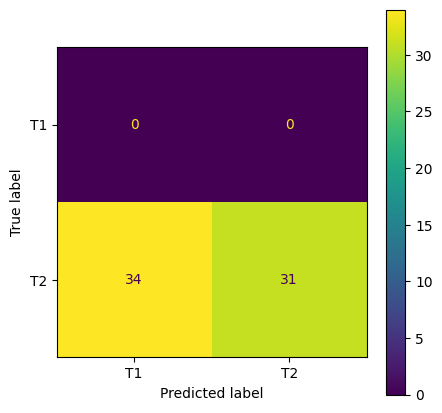

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

#Make predictions
y_probs = model.predict(x_test)
#Convert prediction probabilities into integers
y_preds = [int(round(i)) for i in y_probs[:,0]]
#Confusion matrix
cm=confusion_matrix(y_preds,y_test)
#
label_names = ["T1","T2"]
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_names)
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax)

In [20]:
T1l.shape[1]/721

326.93203883495147

In [49]:
for i, j in enumerate(model(x_test)):
    print(round(j.numpy()[0],2), y_test[i])

0.75 1
0.07 0
0.14 1
0.4 0
0.85 1
0.19 0
0.06 0
0.62 1
0.52 0
0.04 0
1.0 1
0.0 0
0.76 1
0.82 0
0.54 1
0.86 0
0.17 1
0.06 0
0.11 0
0.23 1
0.02 0
0.11 0
0.99 1
0.73 1
0.04 1
0.4 0
0.8 0
0.01 0
0.55 1
0.99 1
0.29 0
0.03 0
0.4 0
0.98 1
0.99 1
0.51 1
0.45 1
0.17 0
0.39 1
0.14 0
0.01 1
0.67 1
0.0 0
0.76 1
0.01 0
0.99 1
0.8 1
0.33 0
0.29 1
0.23 0
0.94 1
0.0 0
0.32 0
0.66 1
1.0 1
0.98 0
0.26 1
0.08 0
0.28 0
0.97 1
0.55 0
0.99 1
0.29 0
0.47 0
0.78 1
0.22 1
0.39 0
0.0 0
0.81 0
0.25 0
1.0 1
0.99 1
0.16 1
0.99 1
0.04 0
0.63 1
0.04 0
0.09 0
0.83 1
1.0 1
0.41 1
1.0 1
0.54 0
0.41 1
0.0 0
0.98 1
0.53 1
0.73 1
0.34 0
0.13 0
0.34 0
0.99 1
0.02 0
0.22 0
0.82 0
0.94 1
0.9 0
0.96 1
0.35 0
0.81 0
0.12 0
1.0 1
0.06 0
0.99 1
1.0 1
0.59 0
0.76 0
0.13 0
0.01 0
0.61 0
0.01 0
0.99 1
0.02 0
0.62 1
0.72 0
0.95 1
0.01 0
0.82 1
1.0 1
0.0 0
0.05 0
0.85 0
0.01 0
1.0 1
0.86 1
1.0 1
0.26 0
0.49 1
0.07 0
0.05 0
1.0 1
0.0 0
0.23 0
0.15 0
0.95 1
0.03 0
0.0 0
0.15 1
0.99 1
0.94 1
0.0 0
0.54 1
0.29 1
0.95 1
0.15 0
1.0 1
0.34 

## Testando SVM simples

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import scipy.sparse.linalg

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(x_train.reshape(x_train.shape[0],-1), y_train)

ValueError: Found array with dim 3. SVC expected <= 2.

In [98]:
x_train.reshape(x_train.shape[0],-1).shape

(688, 11536)

In [99]:
y_train.shape

(688,)

In [94]:
# fazer previsões no conjunto de teste
y_pred = svm_model.predict(x_test)

# avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
accuracy

ValueError: Found array with dim 3. SVC expected <= 2.